In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline
#block warnings
import warnings
warnings.filterwarnings('ignore')

## Table of contents

* **1. Data overview and cleaning**
* **2. Feature engineering**
* **3. EDA - General analysis**
    * 3.1 General analysis conclusions
* **4. Clustering and PCA visualization**
    * 4.1 Clustering conclusions
* **5. Genres analysis**
    * 5.1 Genres analysis conclusions
* **6. Overall conclusions**


# Project objective

The **goal of this project is to explore and analyze** the attributes of Spotify's Top Songs of 2023.

In this project I will try and **understand patterns and trends** of the most listened to songs of the year 2023 by **analyzing both their audio and non-audio features**.

The **second part of the project** will focus on applying **K-Means clustering algorithm** to try and create song genres based on the audio attributes of the songs and visualizing the clustering using **Principal Component Analysis** algorithm.

# 1. Data overview and cleaning

**The initial part of data cleaning was done in Excel**

Features:

* track_name: Name of the song
* artist(s)_name: Name of the artist(s) of the song
* artist_count: Number of artists contributing to the song
* released_year: Year when the song was released
* released_month: Month when the song was released
* released_day: Day of the month when the song was released
* in_spotify_playlists: Number of Spotify playlists the song is included in
* in_spotify_charts: Presence and rank of the song on Spotify charts
* streams: Total number of streams on Spotify
* in_apple_playlists: Number of Apple Music playlists the song is included in
* in_apple_charts: Presence and rank of the song on Apple Music charts
* in_deezer_playlists: Number of Deezer playlists the song is included in
* in_deezer_charts: Presence and rank of the song on Deezer charts
* in_shazam_charts: Presence and rank of the song on Shazam charts
* bpm: Beats per minute, a measure of song tempo
* key: Key of the song
* mode: Mode of the song (major or minor)
* danceability_%: Percentage indicating how suitable the song is for dancing
* valence_%: Positivity of the song's musical content
* energy_%: Perceived energy level of the song
* acousticness_%: Amount of acoustic sound in the song
* instrumentalness_%: Amount of instrumental content in the song
* liveness_%: Presence of live performance elements
* speechiness_%: Amount of spoken words in the song

New features created:
* song_age: Age of a song in years
* number_of_features: Number of featured artists on a song
* tempo: Tempo of a song (slow, medium, upbeat, high)
* era: Era in which a song was released (e.g 2010s, 1990s)
* in_charts: Was the song in any of the charts? (Yes, No)

In [2]:
spotify_data = pd.read_excel('spotify_2023_cleaned.xlsx','spotify_cleaned')

In [3]:
spotify_data.head()

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts      streams  in_apple_playlists  ...  bpm  key   mode  \
0                147  141381703.0                  43  ...  125    B  Major   
1                 48  133716286.0                  48  ...   92   C#  Major   
2                113  140003974.0                  94  ...  138    F  Major   
3                100  800840817.0                 116  ...  170    A  Major   
4                 50  303236322.0                  84  ...  144    A  Minor   

   danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0              80         89       83             31                   0   
1              71         61       74              7                   0   
2              51         32       53             17                   0   
3              55         58       72             11                   0   
4              65         23       80             14                  63   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  
2          31              6  
3          11             15  
4          11              6  

[5 rows x 24 columns]

In [4]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            949 non-null    object 
 1   artist(s)_name        949 non-null    object 
 2   artist_count          949 non-null    int64  
 3   released_year         949 non-null    int64  
 4   released_month        949 non-null    int64  
 5   released_day          949 non-null    int64  
 6   in_spotify_playlists  949 non-null    int64  
 7   in_spotify_charts     949 non-null    int64  
 8   streams               948 non-null    float64
 9   in_apple_playlists    949 non-null    int64  
 10  in_apple_charts       949 non-null    int64  
 11  in_deezer_playlists   949 non-null    int64  
 12  in_deezer_charts      949 non-null    int64  
 13  in_shazam_charts      899 non-null    float64
 14  bpm                   949 non-null    int64  
 15  key                   8

In [5]:
spotify_data.describe()

artist_count  released_year  released_month  released_day  \
count    949.000000     949.000000      949.000000    949.000000   
mean       1.558483    2018.223393        6.029505     13.914647   
std        0.894194      11.137264        3.569558      9.199505   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts       streams  \
count            949.000000         949.000000  9.480000e+02   
mean            5214.329821          12.060063  5.143365e+08   
std             7911.050721          19.601666  5.677971e+08   
min               31.000000           0.000000  2.762000e+03   
25%              875.000000           0.000000  1.416362e+08   
50%             2224.000000           3.000000  2.891651e+08   
75%             5669.000000          16.000000  6.729425e+08   
max            52898.000000         147.000000  3.703895e+09   

       in_apple_playlists  in_apple_charts  in_deezer_playlists  \
count          949.000000       949.000000           949.000000   
mean            68.075869        52.043203           386.659642   
std             86.526736        50.644446          1132.689558   
min              0.000000         0.000000             0.000000   
25%             13.000000         7.000000            13.000000   
50%             34.000000        39.000000            44.000000   
75%             88.000000        87.000000           165.000000   
max            672.000000       275.000000         12367.000000   

       in_deezer_charts  in_shazam_charts         bpm  danceability_%  \
count        949.000000        899.000000  949.000000      949.000000   
mean           2.677555         59.843159  122.460485       66.956797   
std            6.045828        161.193996   28.035537       14.646007   
min            0.000000          0.000000   65.000000       23.000000   
25%            0.000000          0.000000   99.000000       57.000000   
50%            0.000000          2.000000  120.000000       69.000000   
75%            2.000000         37.000000  140.000000       78.000000   
max           58.000000       1451.000000  206.000000       96.000000   

        valence_%    energy_%  acousticness_%  instrumentalness_%  liveness_%  \
count  949.000000  949.000000      949.000000          949.000000  949.000000   
mean    51.420443   64.263435       27.139094            1.566913   18.167545   
std     23.513872   16.575557       26.019257            8.405782   13.698546   
min      4.000000    9.000000        0.000000            0.000000    3.000000   
25%     32.000000   53.000000        6.000000            0.000000   10.000000   
50%     51.000000   66.000000       18.000000            0.000000   12.000000   
75%     70.000000   77.000000       43.000000            0.000000   23.000000   
max     97.000000   97.000000       97.000000           91.000000   97.000000   

       speechiness_%  
count     949.000000  
mean       10.147524  
std         9.930207  
min         2.000000  
25%         4.000000  
50%         6.000000  
75%        11.000000  
max        64.000000

**Missing values**

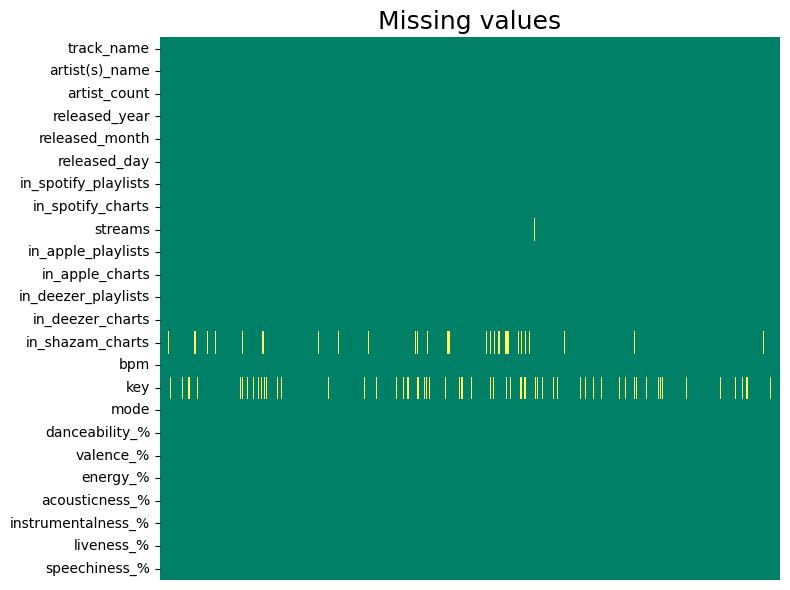

In [6]:
#visualize missing values in the data

fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(spotify_data.isnull().T,xticklabels=False,cbar=False,cmap='summer',ax=ax)

ax.set_title("Missing values",fontsize=18)
ax.tick_params(axis='y',labelsize=10)

plt.tight_layout()
plt.show()

In [7]:
#check streams missing values
from datetime import date, datetime
spotify_data[spotify_data['streams'].isnull()]

#according to https://kworb.net/spotify/artist/1NRzxuPpdGushT8YmF5NAa_songs.html, this song has 165226 streams per day so I'm going to calculate the streams it had on 31st december 2023.

today_date = date.today() 
december_date = datetime(2023, 12, 31).date()
difference = today_date - december_date

spotify_data.loc[spotify_data['streams'].isnull(),'streams'] = 282017550 - 165226 * difference.days

In [8]:
#in_shazam_charts has 50 missing values but it won't really add much to this project so I will just drop it from the dataset

spotify_data.drop(columns='in_shazam_charts',axis=1,inplace=True)

In [9]:
#label missing keys as 'Unknown key'

spotify_data.loc[spotify_data['key'].isnull(),'key'] = 'Unknown key'

# 2. Feature engineering

In [10]:
#extract primary artist of the song (without featured artists)
spotify_data['primary_artist'] = spotify_data['artist(s)_name'].apply(lambda x: x.split(',')[0])
column_to_move = spotify_data.pop('primary_artist')
spotify_data.insert(2,'primary_artist',column_to_move)

In [11]:
#age of the song
spotify_data['song_age'] = 2023 - spotify_data['released_year']

In [12]:
#number of features in a song
spotify_data['number_of_features'] = spotify_data['artist(s)_name'].apply(lambda x: len(x.split(','))-1)

In [13]:
#categorize tempo of a song using 'bpm' feature. As per https://symphonynovascotia.ca/faqs/symphony-101/how-do-musicians-know-how-fast-to-play-a-piece-and-why-are-the-terms-in-italian/#:~:text=Andante%20%E2%80%93%20at%20a%20walking%20pace,bright%20(109%E2%80%93132%20BPM)
def tempo(bpm):
    if bpm < 70:
        return 'Slow'
    elif bpm > 70 and bpm < 100:
        return 'Moderate'
    elif bpm > 100 and bpm <140:
        return 'Upbeat'
    else:
        return 'Fast'

spotify_data['tempo'] = spotify_data['bpm'].apply(tempo)

In [14]:
#categorize era of a song e.g 1990s,2010s
spotify_data['era'] = (spotify_data['released_year'] // 10) * 10
spotify_data['era'] = spotify_data['era'].astype(str) + 's'

# 3. EDA - Overall analysis

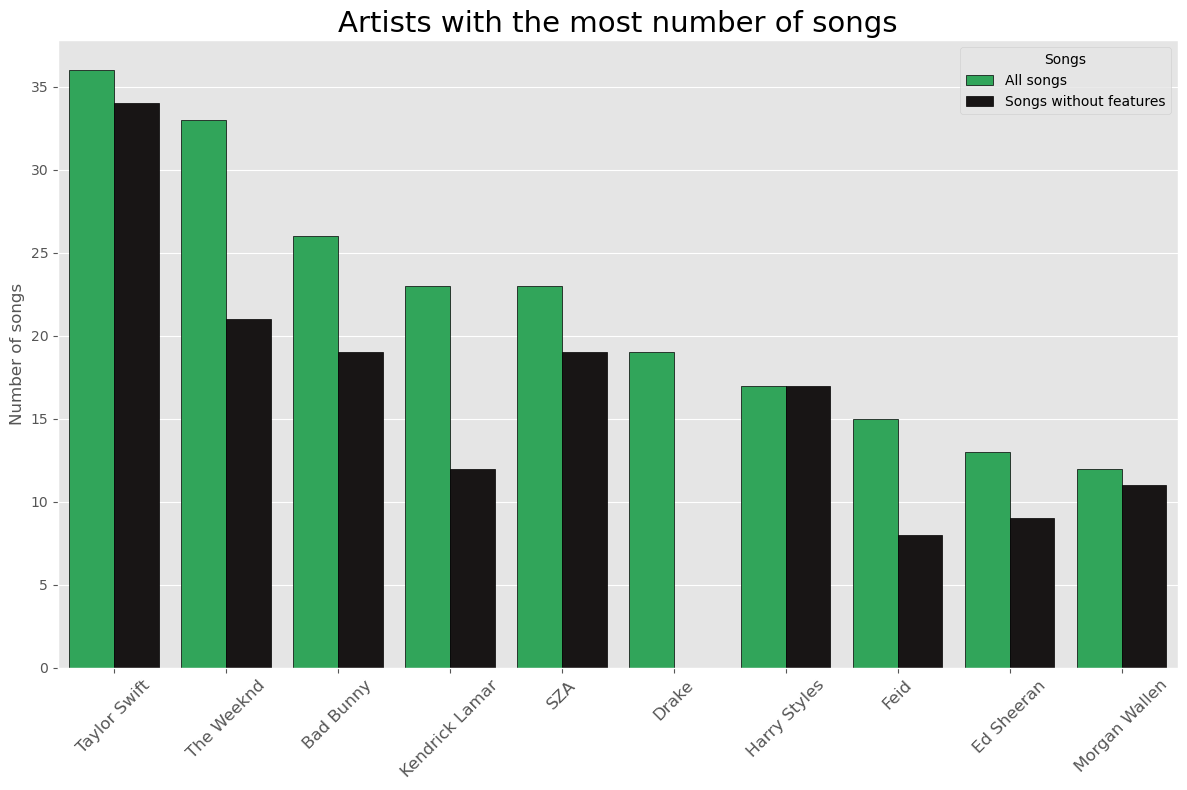

In [15]:
plt.style.use('ggplot')
#artists with most songs in the 2023 spotify top songs list

#merge arist with and without features
no_feature = spotify_data['artist(s)_name'].value_counts().head(10).reset_index()
feature = spotify_data['primary_artist'].value_counts().head(10).reset_index()

no_feature.columns = ['artist','Songs without features']
feature.columns = ['artist','All songs']

merged = pd.merge(feature,no_feature,how='left',on='artist').fillna(0)
melted = pd.melt(merged,id_vars='artist',var_name='Type',value_name='Count')

#plot
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=melted,x='artist', y='Count',hue='Type',palette=sns.color_palette(["#1DB954","#191414"]),ax=ax, edgecolor='black')

plt.ylabel('Number of songs')
plt.xlabel('')
plt.title('Artists with the most number of songs',fontsize=21)
plt.legend(title='Songs')
plt.xticks(fontsize=12,rotation=45)

plt.tight_layout()
plt.show()

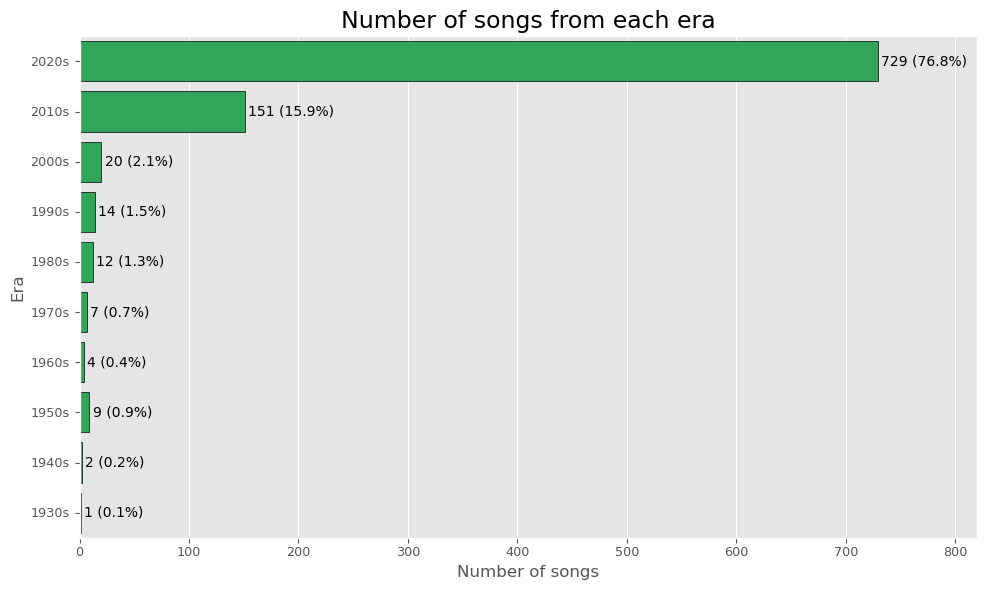

In [16]:
#how many songs from each era

fig, ax = plt.subplots(figsize=(10,6))
era_data = spotify_data['era'].value_counts().sort_index(ascending=False).reset_index()

sns.barplot(era_data,y = 'era',x='count',color='#1DB954',edgecolor='black')

ax.set_title('Number of songs from each era',fontsize=17)
ax.set_ylabel('Era',fontsize=12)
ax.set_xlabel('Number of songs',fontsize=12)
ax.tick_params(axis='both',labelsize=9.2)
plt.xlim(0,820)

for index, value in enumerate(era_data['count']):
    plt.text(value+3, index,f"{value} ({(value/era_data['count'].sum())*100:.1f}%)",va='center')
    
plt.tight_layout()
plt.show()

In [17]:
#radar plot for song traits
trait_cols = [col for col in spotify_data.columns if col.endswith('%')]
mean_trait = spotify_data[trait_cols].mean().reset_index()
mean_trait.columns = ['Trait','Percentage']
mean_trait['Trait'] = mean_trait['Trait'].str[:-2].str.capitalize()

#close the radar plot
traits = mean_trait['Trait']
values = mean_trait['Percentage']
traits = list(traits) + [traits[0]]
values = list(values) + [values[0]]

fig = go.Figure(data = go.Scatterpolar(r=values,theta=traits, fill='toself', line=dict(color='green')))

fig.update_layout(
    title={'text': 'Song traits distribution', 'font': {'size': 27, 'color': 'black'},'x': 0.5},
    polar=dict(bgcolor='#cff2cb'),
    
)

fig.show()

In [18]:
spotify_data['mode'].value_counts()

mode
Major    548
Minor    401
Name: count, dtype: int64

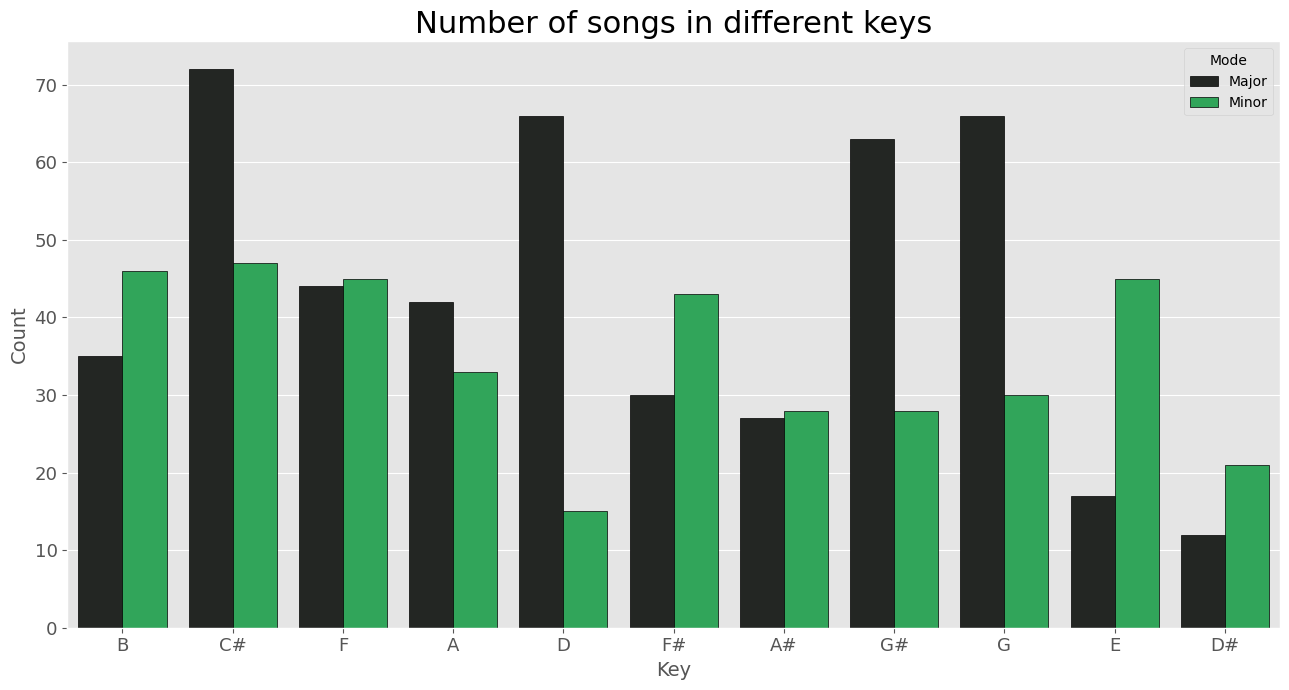

In [19]:
#most popular keys

fig, ax = plt.subplots(figsize=(13,7))

sns.countplot(spotify_data.drop(spotify_data.loc[spotify_data['key'] == 'Unknown key'].index,axis=0),x='key',hue='mode',color='#1DB954',edgecolor='black')

ax.set_title('Number of songs in different keys',fontsize=22)
ax.set_ylabel('Count',fontsize=14)
ax.set_xlabel('Key',fontsize=14)
ax.tick_params(axis='both',labelsize=13)
ax.legend(title='Mode')
    
plt.tight_layout()
plt.show()

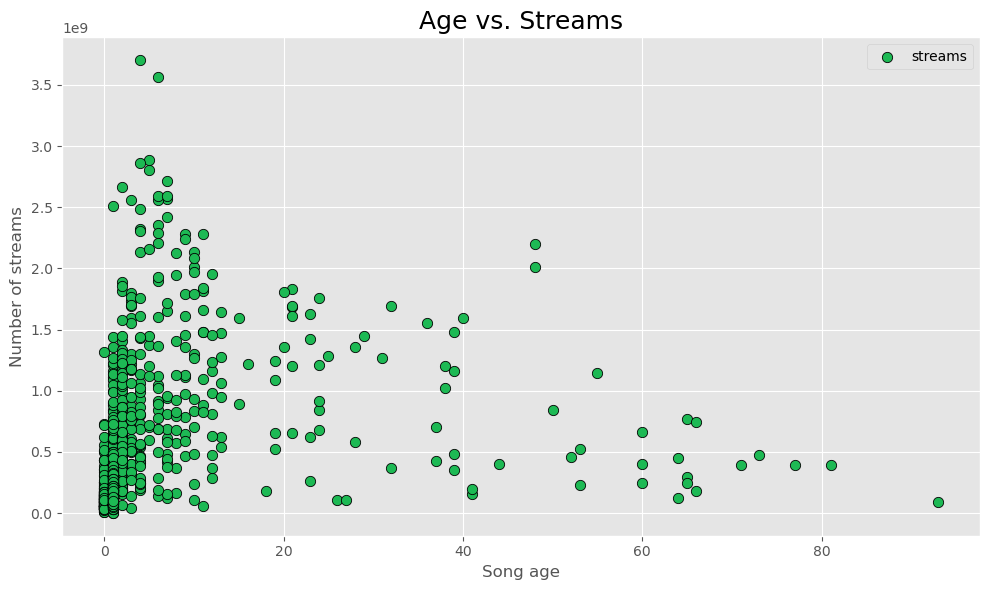

In [20]:
#Song age vs streams
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(data=spotify_data, y= 'streams',x='song_age', color ='#1DB954',s=55,edgecolor='black')

ax.set_title('Age vs. Streams',fontsize=18)
ax.set_ylabel('Number of streams',fontsize=12)
ax.set_xlabel('Song age',fontsize=12)
ax.tick_params(axis='both',labelsize=10)
ax.legend(spotify_data[['streams','song_age']].corr())

plt.tight_layout()
plt.show()


In [21]:
spotify_data[['streams','song_age']].corr()

streams  song_age
streams   1.000000  0.226254
song_age  0.226254  1.000000

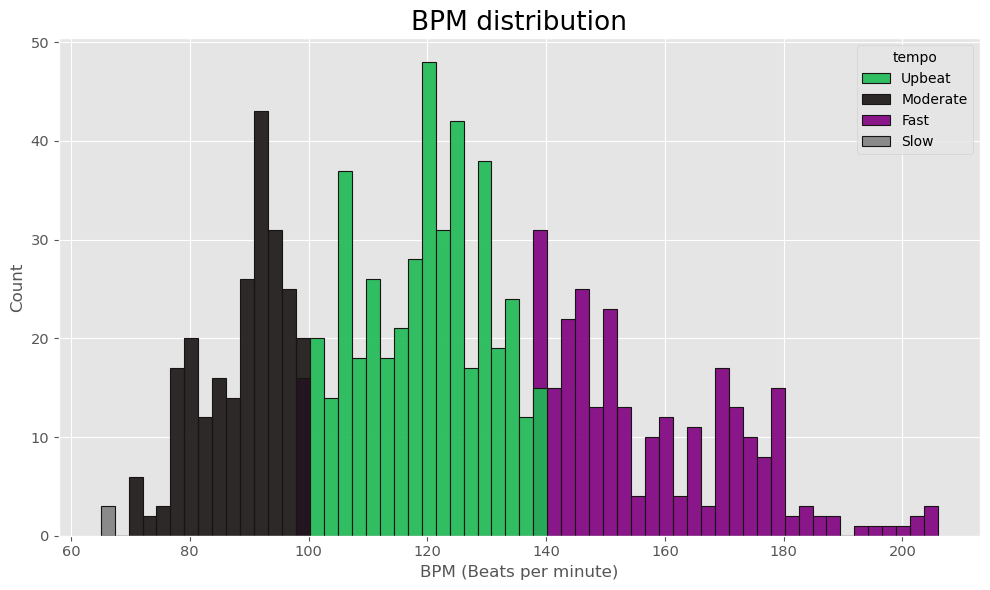

In [22]:
#bpm histogram
fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(data=spotify_data, x='bpm',bins=60,hue='tempo',alpha=0.9,palette=sns.color_palette(["#1DB954","#191414","purple","gray"]),edgecolor='#191414',linewidth=0.8)


ax.set_title('BPM distribution',fontsize=19)
ax.tick_params(axis='both',labelsize=10.5)
ax.set_xlabel('BPM (Beats per minute)')

plt.tight_layout()
plt.show()

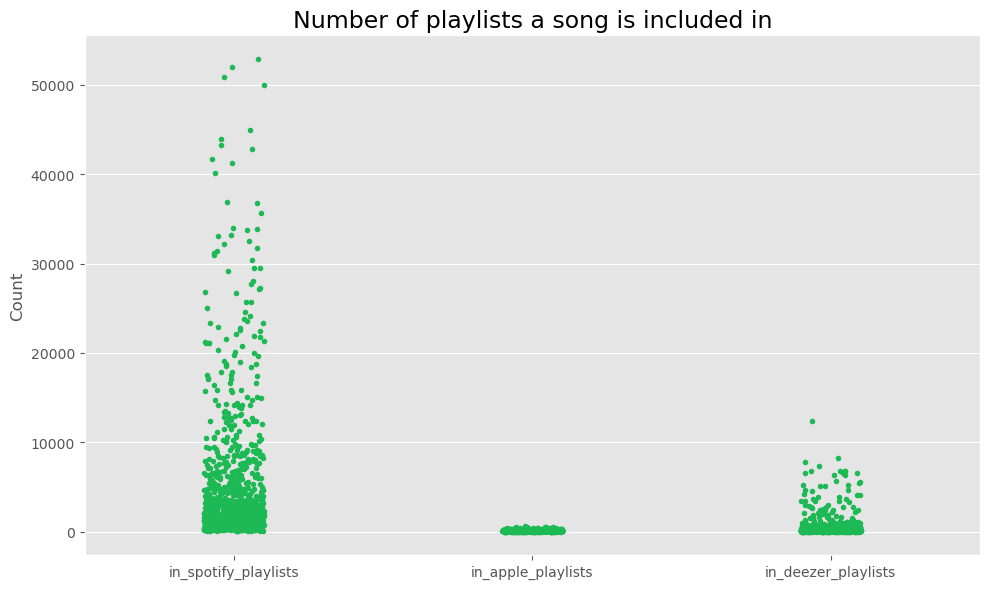

In [23]:
#stripplot of the playlist count
playlist_columns = [col for col in spotify_data.columns if col.endswith('playlists')]

fig, ax = plt.subplots(figsize=(10,6))

sns.stripplot(spotify_data[playlist_columns],color='#1DB954',size=4)

ax.set_title('Number of playlists a song is included in',fontsize=17)
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [24]:
#is the song in any of the charts?
def incharts(row):
    spotify, apple, deezer = row['in_spotify_charts'], row['in_apple_charts'], row['in_deezer_charts']
    if spotify>0 or apple>0 or deezer>0:
        return 'Yes'
    else:
        return 'No'

spotify_data['in_charts'] = spotify_data[['in_spotify_charts','in_apple_charts','in_deezer_charts']].apply(incharts,axis=1)

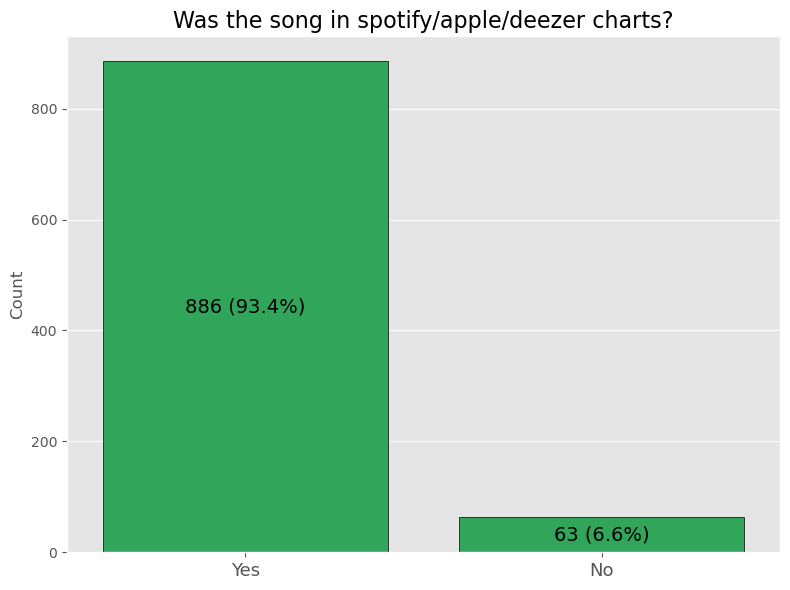

In [25]:
fig, ax = plt.subplots(figsize=(8,6))

sns.countplot(spotify_data,x='in_charts',color='#1DB954',edgecolor='black')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2,p.get_height()/2 -1, f"{int(p.get_height())} ({p.get_height()/949*100:.1f}%)",
            ha='center', va='center', fontsize=14, color='black') 

plt.ylabel('Count')
plt.xlabel('')
ax.tick_params(axis='x',labelsize=13)
ax.set_title('Was the song in spotify/apple/deezer charts?',fontsize=16)

plt.tight_layout()
plt.show()

## 3.1 General analysis conclusions

---

### Artists
- **Taylor Swift** has the most songs in the 2023 Spotify Top Songs list (37).  
- **Harry Styles** is the only Top 10 artist with no features.  
- **Drake** is the only Top 10 artist without solo songs.  

---

### Era
- Songs span across **10 eras (1930s - 2020s)**.  
- Most songs are from the **2020s era (76.8%)**, while the **1930s** contribute only 0.1%.  
- Songs from **2000-2023** account for over 90% of the total songs in the list.  

---

### Traits
* **Dominating traits**:  
  - Energy 
  - Valence (positive mood)  
  - Danceability
* **Least present traits**:  
  - Liveness 
  - Instrumentalness 
  - Speechiness  

---

### Key and Mode
- **Most common key**: C# Major  
- **Least common key**: D Minor  
- Over **50% of the songs** are composed in Major keys.  

---

### Streaming and Age
- There is a **very weak positive correlation (0.227)** between the number of streams and the age of songs.  
  - This suggests that songs in the 2023 Top List didn't accumulate significantly more streams despite being on Spotify for longer. 
  - It might be because Spotify is mainly used by younger audience who tend to listen to newer music compared to older people who may listen to more music from their younger years.

---

### Playlist Inclusion
- **The most songs** are included in **Spotify playlists**.  
- **The least songs** are included in **Apple playlists**.
    - This is understandable since the list contains Top Spotify songs. The Apple song list may be different.
---

### Chart
- Over **93% of the songs** in the 2023 Top Songs list appeared in some place in the charts. 


# 4. Clustering and PCA visualization

**Clusterization of songs based on their audio attributes to try and create 'genres'. Clusterization will be done with K-Means clustering algorithm which is an unsupervized learning method**

Preparing features for clustering and choosing the best K value with elbow method and silhouette score.

In [26]:
trait_cols.remove('liveness_%')

In [27]:
#standardize the features
from sklearn.preprocessing import StandardScaler

features_to_cluster = trait_cols

scaler = StandardScaler()
scaler.fit(spotify_data[features_to_cluster])
scaled_cluster_feat = scaler.transform(spotify_data[features_to_cluster])

cluster_df = pd.DataFrame(scaled_cluster_feat,columns = features_to_cluster)

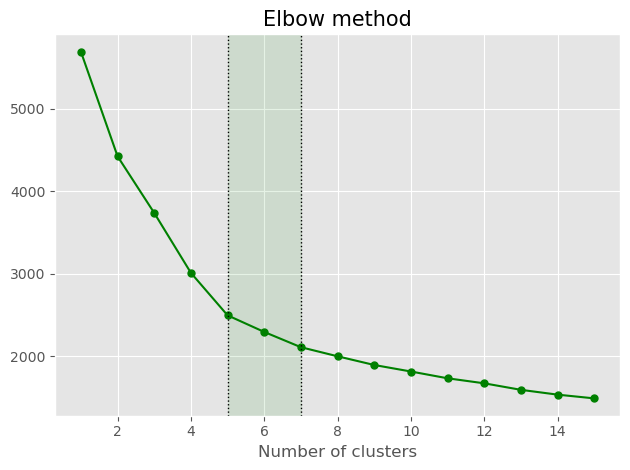

In [28]:
#elbow method
from sklearn.cluster import KMeans

wcss = []
for i in range(1,16):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(cluster_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 16), wcss,marker='o',markersize=5, color = 'green')
plt.title('Elbow method',fontsize=15)
plt.xlabel('Number of clusters') 

plt.axvline(x=5,color='black',linestyle = 'dotted',lw=1)
plt.axvline(x=7,color='black',linestyle = 'dotted',lw=1)
plt.axvspan(5, 7, color='green', alpha=0.1)

plt.tight_layout()
plt.show()

Elbow method shows that the appropriate number of clusters lay somewhere between 5 and 7, although it is very vague.

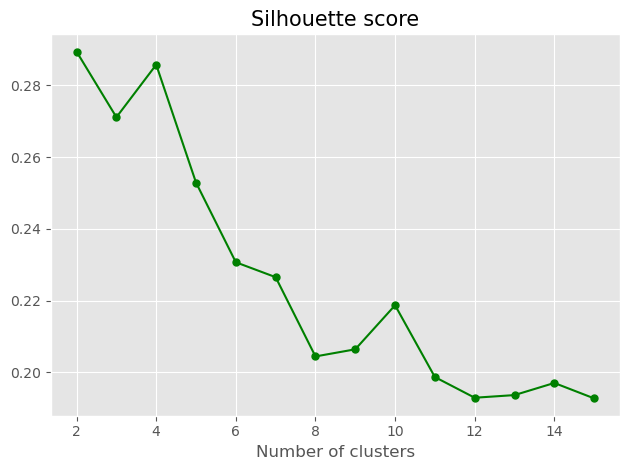

In [29]:
#silhouette score
from sklearn.metrics import silhouette_score

sil_score = []
for i in range(2,16):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(cluster_df)
    score = silhouette_score(cluster_df,kmeans.labels_)
    sil_score.append(score)
    
plt.plot(range(2, 16), sil_score,marker='o',markersize=5, color = 'green')
plt.title('Silhouette score',fontsize=15)
plt.xlabel('Number of clusters') 

plt.tight_layout()
plt.show()

With 2 clusters the silhouette score is the highest but it is not enough to create genres. Silhouette score for 4 clusters is also high, although it might be not enough to create more specified genres.

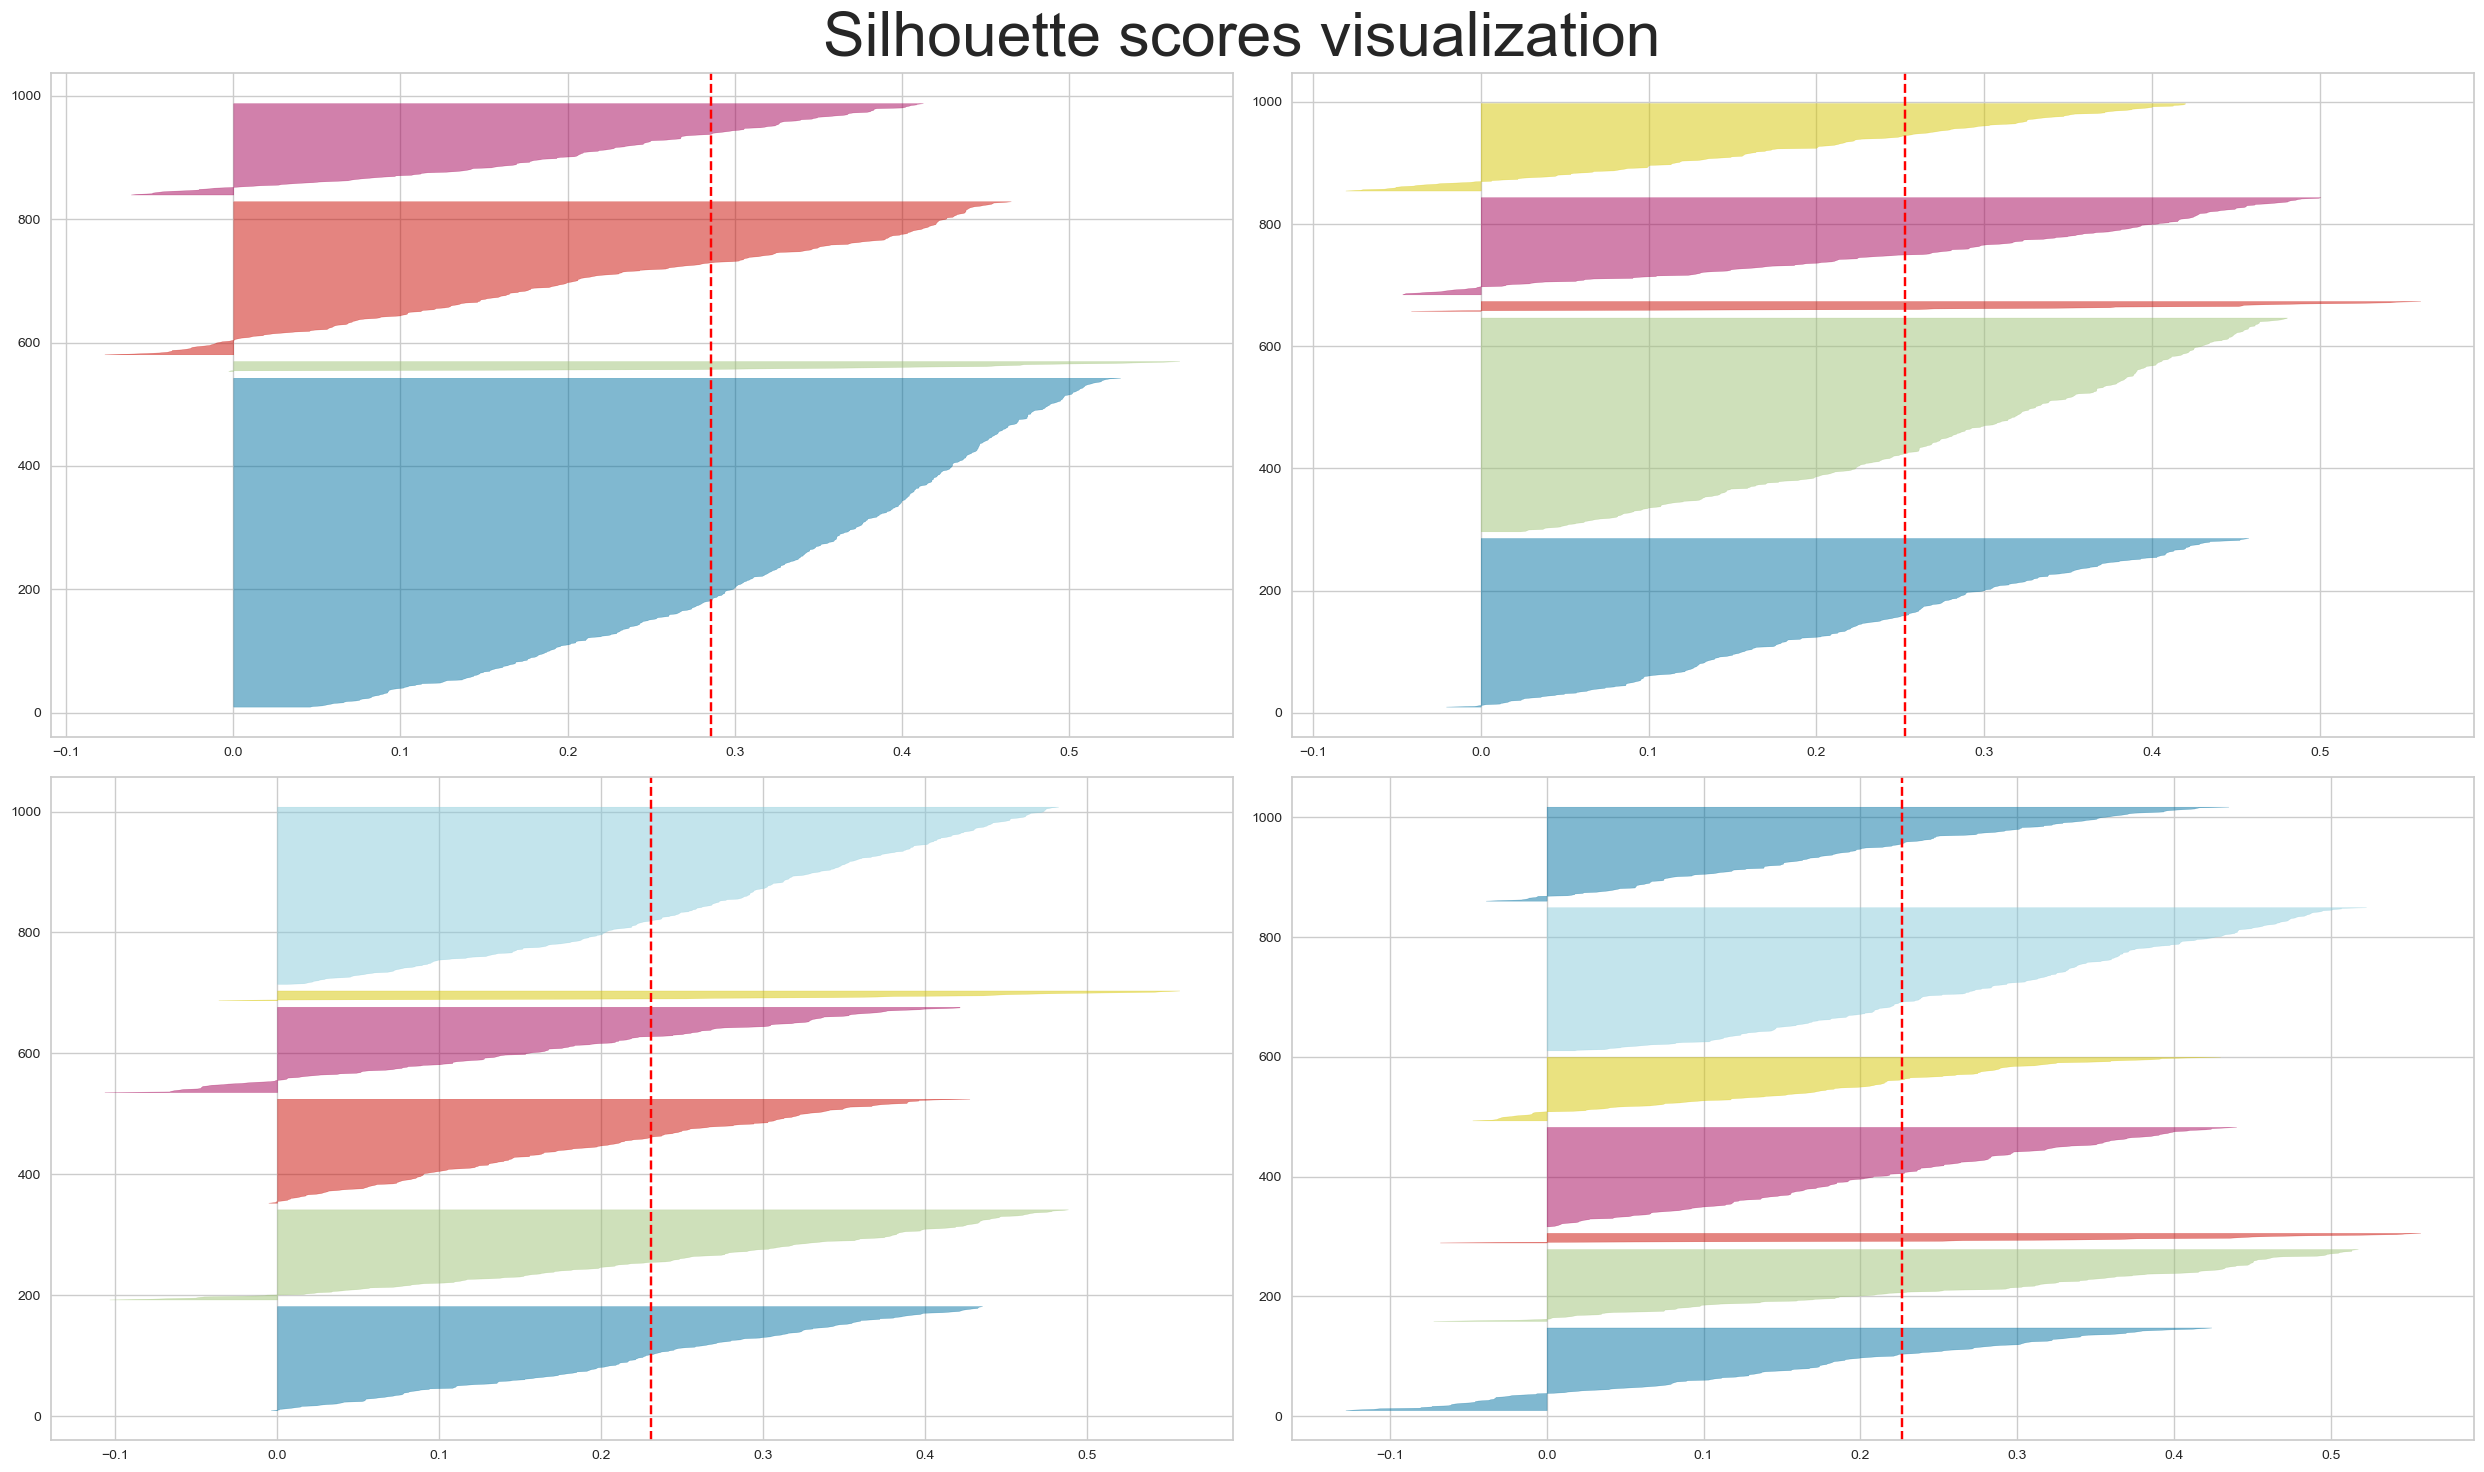

In [30]:
#silhouette score visualizer
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(25,15))
ax = ax.flatten()

for i, kvalue in enumerate(range(4,8)):
    
    kmeans = KMeans(n_clusters=kvalue, random_state=42)
    
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[i])
    visualizer.fit(cluster_df)

plt.suptitle('Silhouette scores visualization', size=45)
    
plt.tight_layout()
plt.show()

5 clusters seem to be appropriate since they are enough to create more specified genres and also the cluster sizes seem to be more uniform than in the case of 4 whereas 6 clusters might be too much.

In [31]:
#label songs with appropriate clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(cluster_df)

cluster_labels = kmeans.predict(cluster_df)
spotify_data['Cluster'] = cluster_labels

In [32]:
cluster_groupedby = spotify_data.groupby('Cluster')[features_to_cluster].mean()

In [33]:
cluster_groupedby

danceability_%  valence_%   energy_%  acousticness_%  \
Cluster                                                         
0             60.599278  34.422383  67.476534       12.862816   
1             75.723647  72.085470  72.509972       19.683761   
2             60.352941  32.235294  58.647059       31.000000   
3             54.337500  37.306250  42.018750       68.568750   
4             72.618056  51.694444  63.361111       26.284722   

         instrumentalness_%  speechiness_%  
Cluster                                     
0                  0.700361       6.122744  
1                  0.253561       7.116809  
2                 57.411765       5.411765  
3                  1.306250       5.962500  
4                  0.131944      30.486111

We got the following clusters:

* **Cluster 0:** High energy and moderate danceability with below-average valence (mood) suggests **pop-rock/alternative** genre

* **Cluster 1:** Combination of high danceability, valence and energy strongly suggests that this is **dance pop** genre 

* **Cluster 2:** High instrumentalness and elevated acousticness combined with low valence out of all clusters points at **instrumental/ambient music**.

* **Cluster 3:** High acousticness and low energy indicates that this cluster cointains **acoustic ballads/folk** songs.

* **Cluster 4:** High speechiness combined with high energy suggests **rap/hip-hop** genre.

In [34]:
def genres(cluster):
    if cluster == 0:
        return 'pop-rock/alternative'
    elif cluster == 1:
        return 'dance pop'
    elif cluster == 2:
        return 'instrumental/ambient'
    elif cluster == 3:
        return 'ballads/folk'
    else:
        return 'rap/hip-hop'
spotify_data['Genre'] = spotify_data['Cluster'].apply(genres)

In [35]:
spotify_data['Genre'].value_counts()

Genre
dance pop               351
pop-rock/alternative    277
ballads/folk            160
rap/hip-hop             144
instrumental/ambient     17
Name: count, dtype: int64

Cluster 2, which is instrumental/ambient music has only 17 songs which are very mixed genres. It is because of a high instrumentalness value in each of these songs that the clustering algorithm puts them together. Let's see how the clusters will look if we get rid of the instrumentalness trait.

In [36]:
trait_cols.remove('instrumentalness_%')

In [37]:
#standardize the features
from sklearn.preprocessing import StandardScaler

features_to_cluster = trait_cols

scaler = StandardScaler()
scaler.fit(spotify_data[features_to_cluster])
scaled_cluster_feat = scaler.transform(spotify_data[features_to_cluster])

cluster_df = pd.DataFrame(scaled_cluster_feat,columns = features_to_cluster)

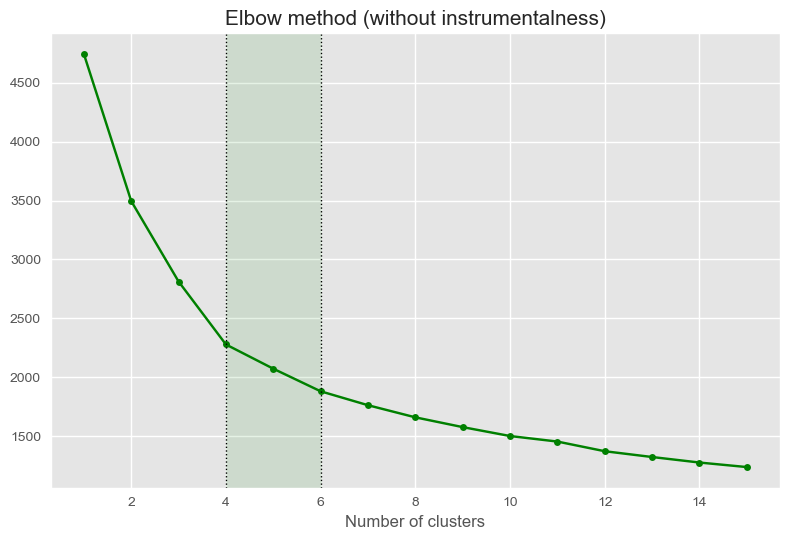

In [38]:
plt.style.use('ggplot')
#elbow method
from sklearn.cluster import KMeans

wcss = []
for i in range(1,16):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(cluster_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 16), wcss,marker='o',markersize=5, color = 'green')
plt.title('Elbow method (without instrumentalness)',fontsize=15)
plt.xlabel('Number of clusters') 

plt.axvline(x=4,color='black',linestyle = 'dotted',lw=1)
plt.axvline(x=6,color='black',linestyle = 'dotted',lw=1)
plt.axvspan(4, 6, color='green', alpha=0.1)

plt.tight_layout()
plt.show()

Now the elbow method indicates that the appropriate number of clusters is somewhere between 4-6 so one less then previously.

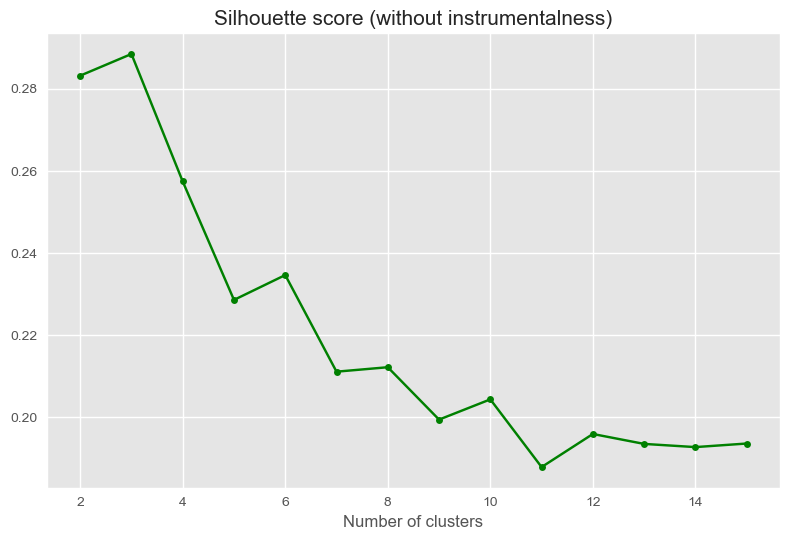

In [39]:
#silhouette score
from sklearn.metrics import silhouette_score

sil_score = []
for i in range(2,16):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(cluster_df)
    score = silhouette_score(cluster_df,kmeans.labels_)
    sil_score.append(score)
    
plt.plot(range(2, 16), sil_score,marker='o',markersize=5, color = 'green')
plt.title('Silhouette score (without instrumentalness)',fontsize=15)
plt.xlabel('Number of clusters') 

plt.tight_layout()
plt.show()

Now silhouette score is the highest for 3 clusters.

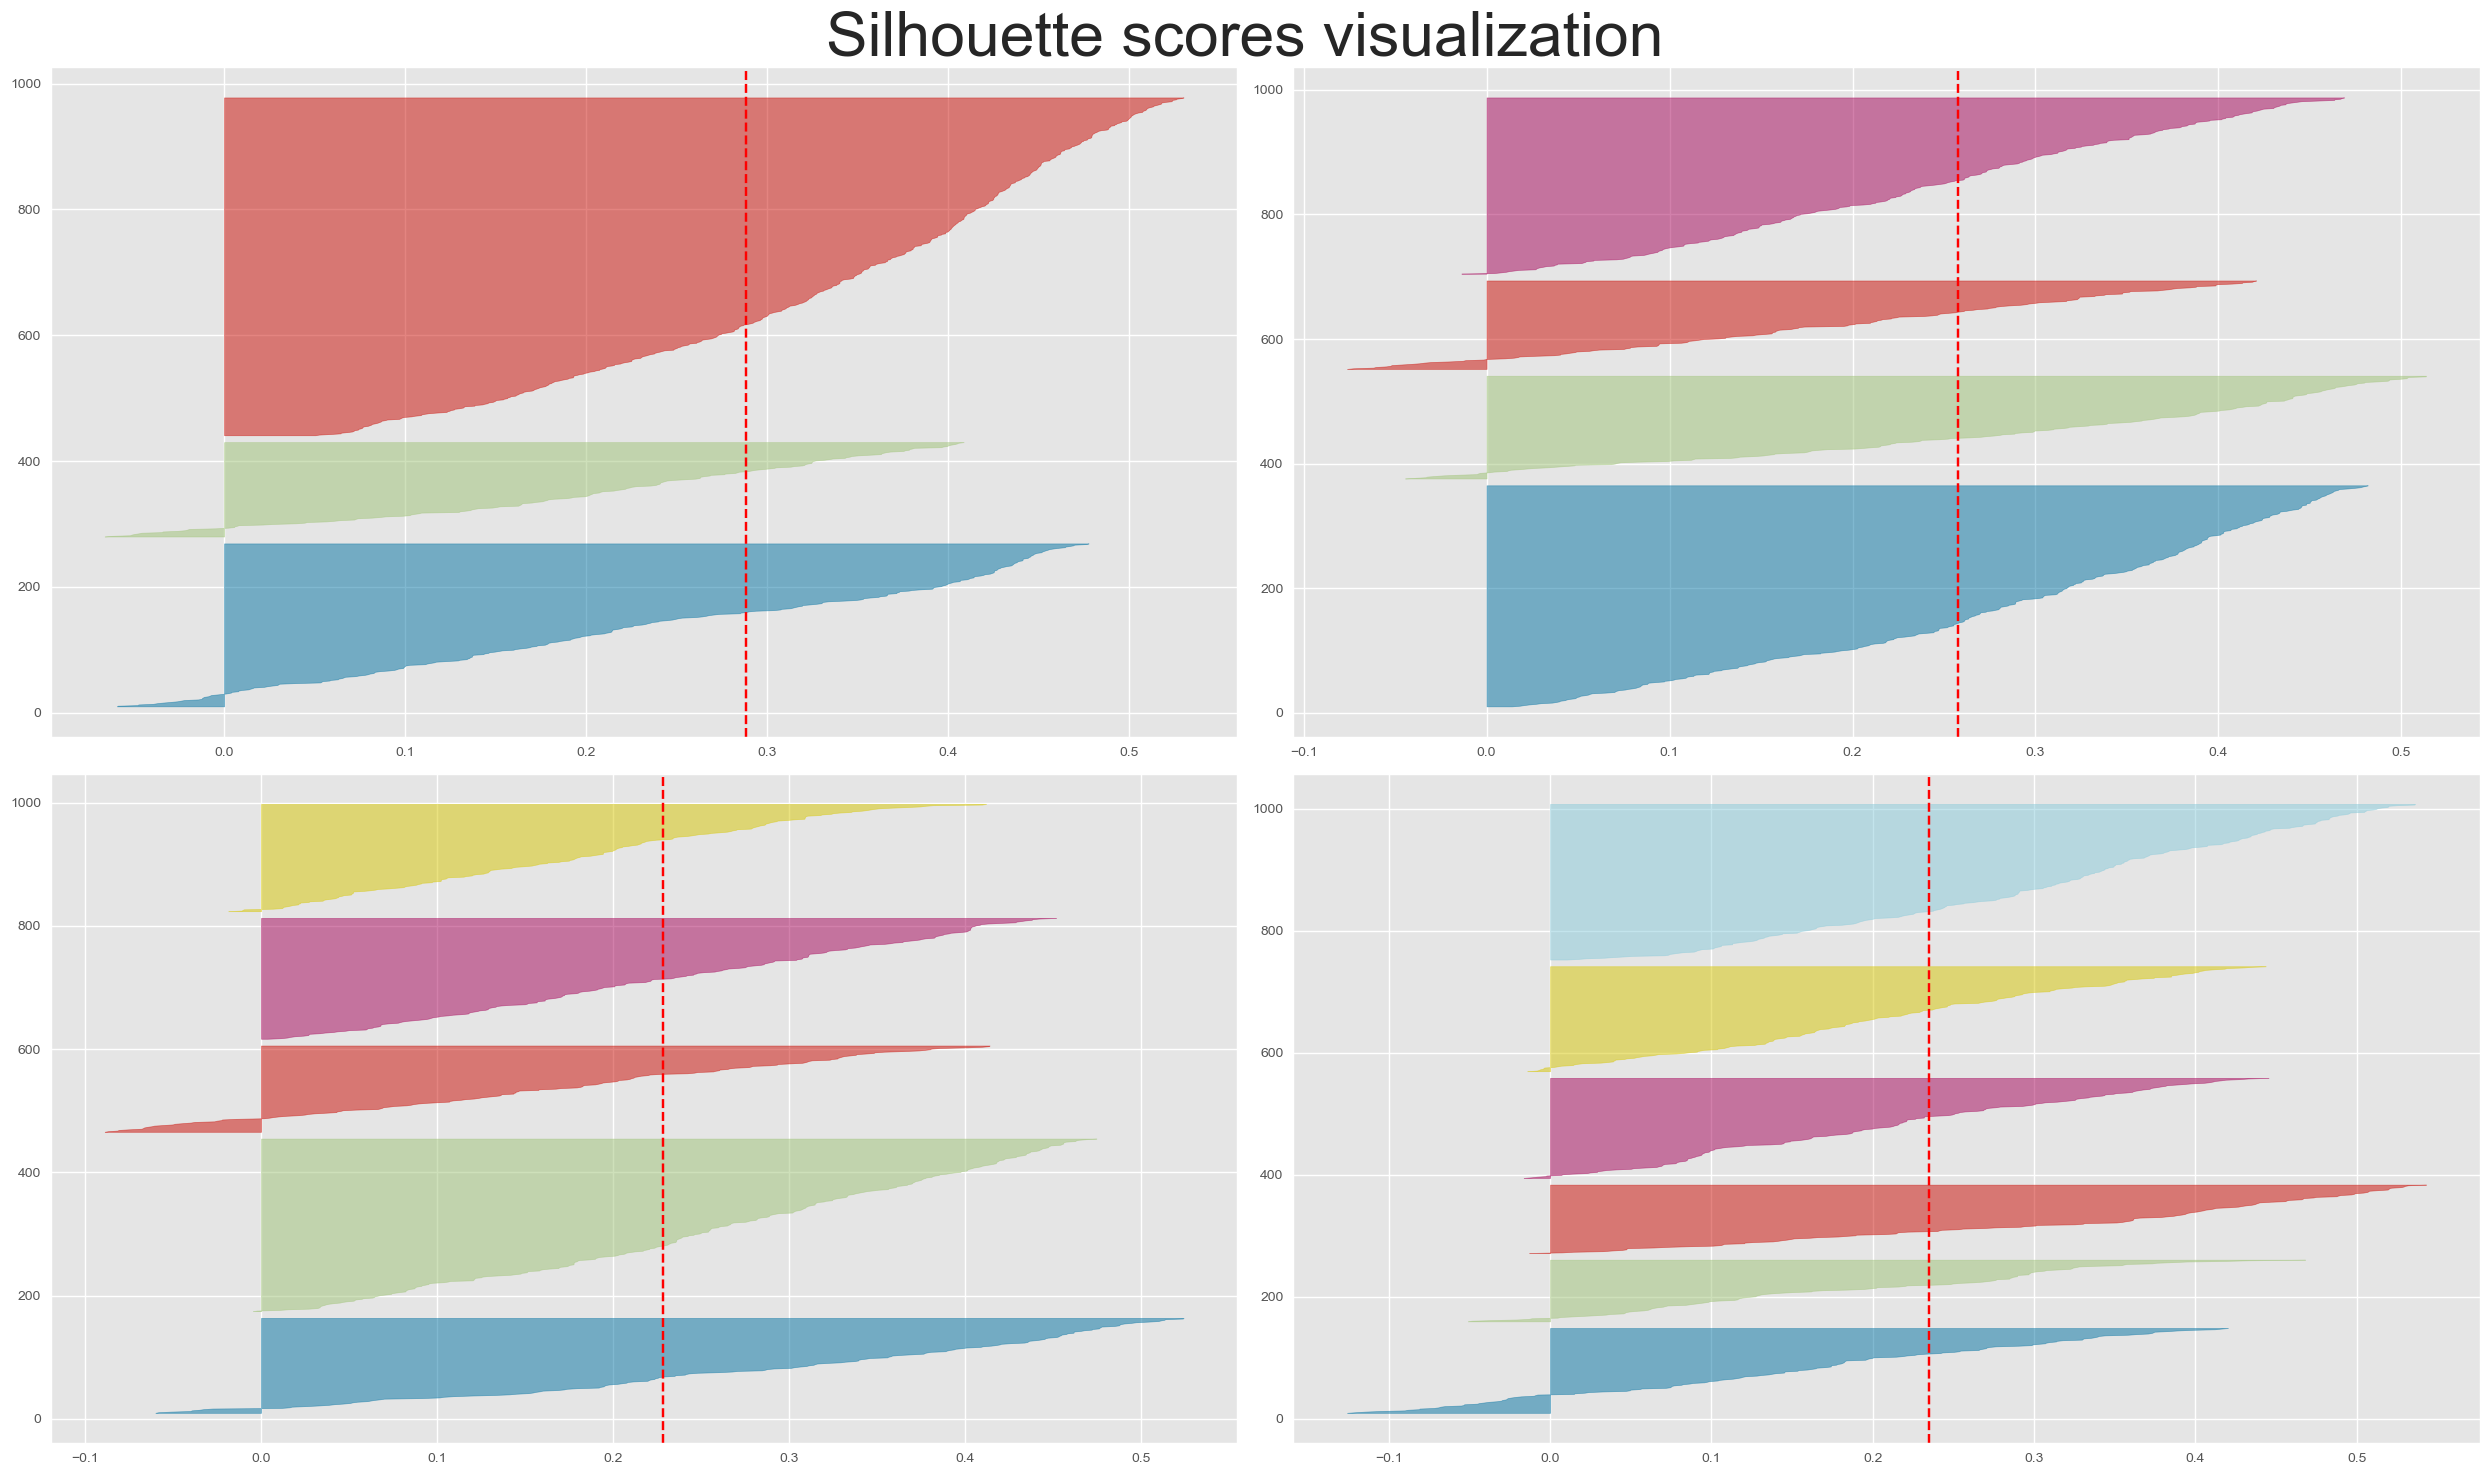

In [40]:
#silhouette score visualizer
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(25,15))
ax = ax.flatten()

for i, kvalue in enumerate(range(3,7)):
    
    kmeans = KMeans(n_clusters=kvalue, random_state=42)
    
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[i])
    visualizer.fit(cluster_df)

plt.suptitle('Silhouette scores visualization', size=45)
    
plt.tight_layout()
plt.show()

Now 4 clusters seem to be the best choice since the cluster sizes are somewhat similar and there are not many points with negative silhouette scores.

In [41]:
#label songs with appropriate clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(cluster_df)

cluster_labels = kmeans.predict(cluster_df)
spotify_data['Cluster'] = cluster_labels

In [42]:
cluster_groupedby = spotify_data.groupby('Cluster')[features_to_cluster].mean()
cluster_groupedby

danceability_%  valence_%   energy_%  acousticness_%  speechiness_%
Cluster                                                                     
0             75.851124  71.839888  72.424157       19.699438       7.151685
1             54.566265  36.819277  41.614458       68.186747       5.933735
2             72.475524  51.622378  63.377622       26.468531      30.559441
3             60.271127  34.257042  67.718310       12.809859       6.088028

After excluding instrumentalness trait we get higher silhouette score for 3 clusters, although they are not enough to classify these songs into more specified genres. That's why **I decided to choose 4 clusters because I think in this case the algorithm creates clusters with features that are distinctive enough to accurately assign genres to them.**

Now we have the following:

* **Cluster 0:** Combination of high danceability, valence and energy strongly suggests that this is **dance pop** genre 

* **Cluster 1:** High acousticness and low energy indicates that this cluster cointains **acoustic ballads/folk** songs.

* **Cluster 2:** High speechiness combined with high energy suggests **rap/hip-hop** genre.

* **Cluster 3:** High energy and moderate danceability with below-average valence (mood) suggests **pop/pop-rock** genre

In [43]:
def genres(cluster):
    if cluster == 3:
        return 'pop/pop-rock'
    elif cluster == 0:
        return 'dance pop'
    elif cluster == 1:
        return 'ballads/folk'
    else:
        return 'rap/hip-hop'
spotify_data['Genre'] = spotify_data['Cluster'].apply(genres)

Now let's visualize clustering of songs based on audio features using Principal Component Analysis (PCA). 

It is an algorithm used to reduce the number of dimensions of the data while retaining as much variance (information) as possible.

In [44]:
from sklearn.decomposition import PCA

pca = PCA()
pca_result = pca.fit_transform(scaled_cluster_feat)

#pca dataframe
explained_variance = pd.DataFrame({
    'PCA Component': [f'{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Explained Variance (%)': pca.explained_variance_ratio_ * 100,
    'Cumulative Variance (%)': pca.explained_variance_ratio_.cumsum() * 100
})

explained_variance

PCA Component  Explained Variance (%)  Cumulative Variance (%)
0             1               39.101034                39.101034
1             2               22.888732                61.989766
2             3               18.898856                80.888622
3             4               12.776285                93.664907
4             5                6.335093               100.000000

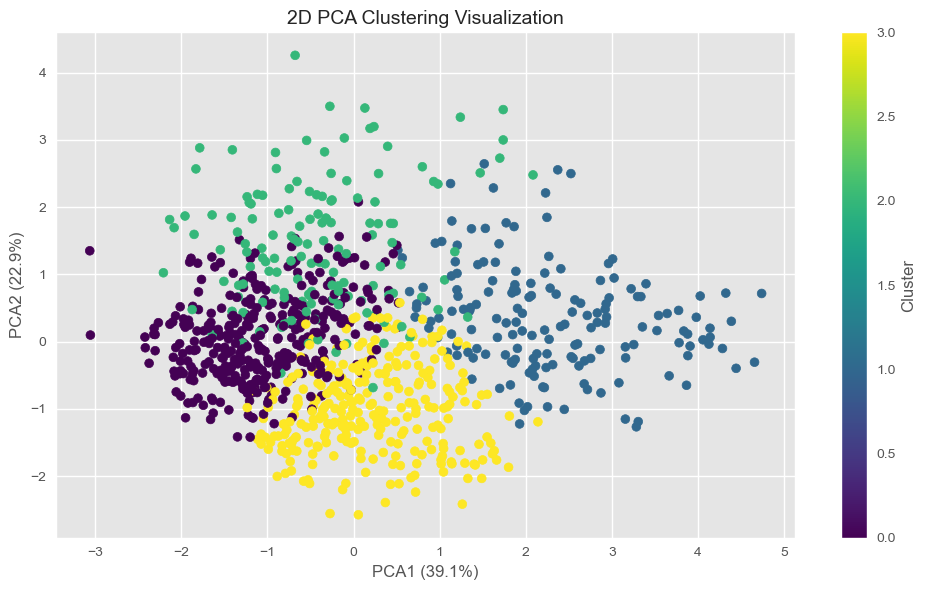

In [45]:
#2D PCA clusters visualization
fig, ax = plt.subplots(figsize=(10, 6))

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis', s=40, alpha=1)

plt.xlabel('PCA1 (39.1%)', fontsize=12)
plt.ylabel('PCA2 (22.9%)', fontsize=12)
plt.title('2D PCA Clustering Visualization', fontsize=14)
plt.colorbar(label='Cluster')


plt.tight_layout()
plt.show()

There is some significant overlapping of the clusters in this 2D PCA visualization. 

Let's see if they seem to be better separated in 3D space.

In [46]:
import plotly.express as px
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2', 'PCA3','PCA4','PCA5'])
pca_df['Cluster'] = cluster_labels

fig = px.scatter_3d(pca_df, x='PCA1', y='PCA2', z='PCA3', color='Cluster', title="3D PCA Clustering",
                    labels={'PCA1': 'PCA1 (39.1%)', 'PCA2': 'PCA2 (22.9%)', 'PCA3': 'PCA3 (18.9%)'})

fig.show()

## 4.1 Clustering conclusions:

* The 3D plot demonstrates that the clusters are **well-separated**, indicating that **removing the 'instrumentalness' variable** and opting for **4 clusters** was a right decision. 
---
* This approach successfully resulted in **4 fairly distinct groups of songs**:
    * **Cluster 0:** dance pop genre.

    * **Cluster 1:** acoustic ballads/folk genre.

    * **Cluster 2:** rap/hip-hop genre.

    * **Cluster 3:** pop/pop-rock genre.
---
* The clusters that are the **most dense and also the closest together are 0 and 3** which corresponds to **genres 'dance pop' and 'pop/pop-rock'**
    * These genres are the most similar to each other which explains the closeness.
    * These genres could've been clustered together if I chose 3 clusters, though the genre would be more broad and probably classified as just 'pop music'.
---
* The **rap/hip-hop** cluster has the **most variability** in the audio features which might indicate that the algorithm assigned songs that are **not purely rap/hip-hop to this cluster**.

# 5. Genres analysis

In [47]:
genre_data = spotify_data['Genre'].value_counts().sort_values(ascending=False).reset_index()
sum_genre = genre_data['count'].sum()

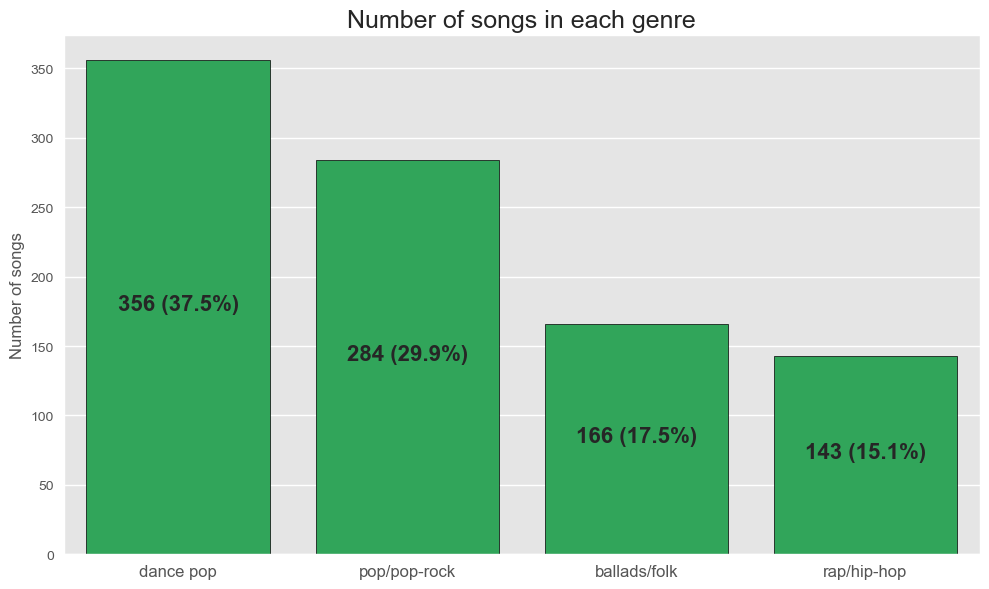

In [48]:
#number of songs in each genre
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(genre_data, y='count',x='Genre', color='#1DB954',edgecolor='black')

plt.title('Number of songs in each genre',fontsize=18)
plt.ylabel('Number of songs')
plt.xlabel('')
plt.tick_params(axis='x',labelsize=12)
 
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height()/2 -5,s=f'{int(p.get_height())} ({p.get_height()/sum_genre *100:.1f}%)',va='bottom',ha='center'
           ,fontsize=16,fontweight='bold')

plt.tight_layout()
plt.show()

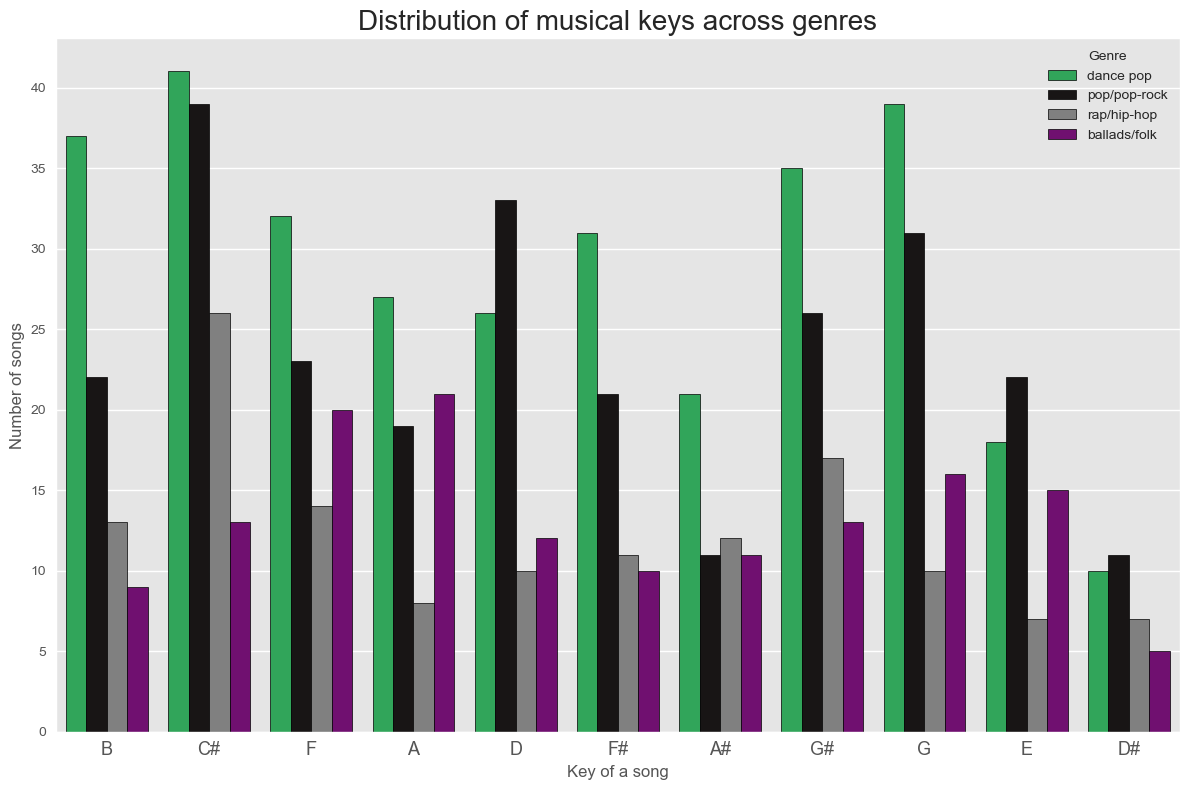

In [49]:
#key vs. genre
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(spotify_data[spotify_data['key']!='Unknown key'],x='key',hue='Genre'
              ,palette=sns.color_palette(["#1DB954","#191414","gray","purple"]),edgecolor='black')

plt.title('Distribution of musical keys across genres',fontsize=20)
plt.ylabel('Number of songs')
plt.xlabel('Key of a song')
plt.tick_params(axis='x',labelsize=13)


plt.tight_layout()
plt.show()

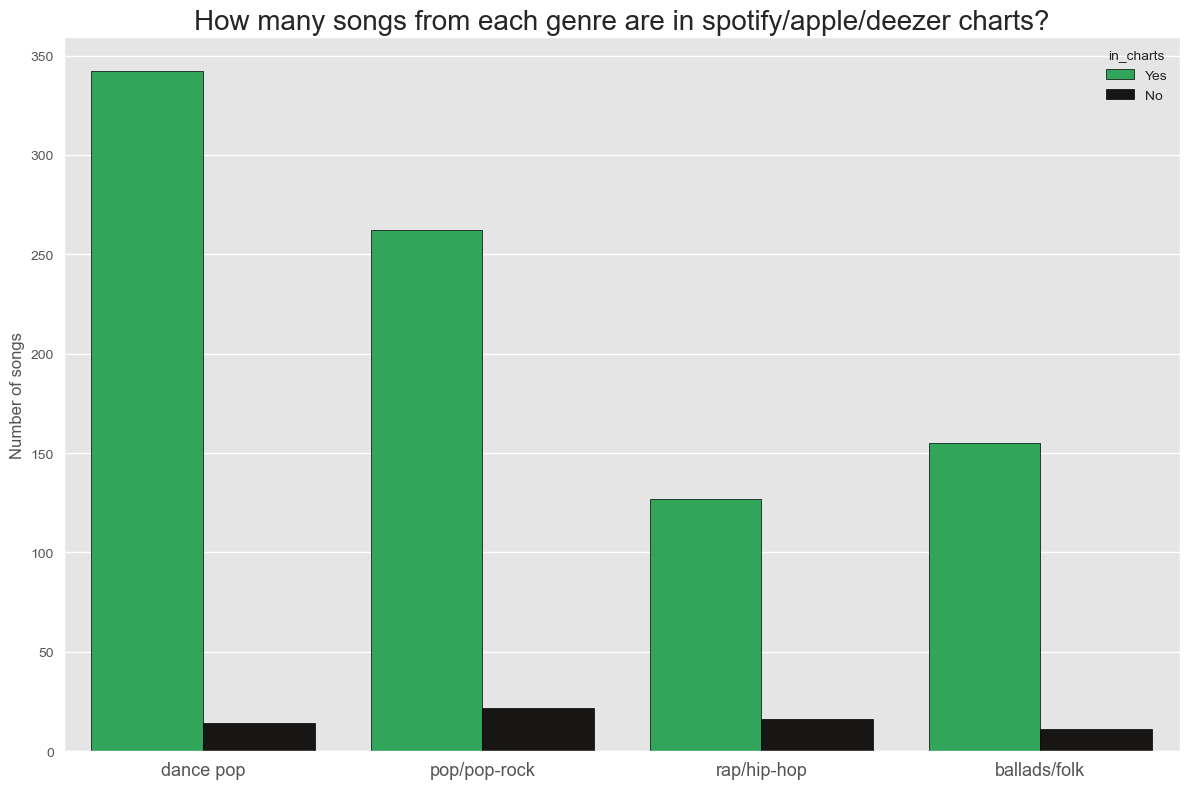

In [50]:
plt.style.use('ggplot')
#key vs. genre
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(spotify_data,x='Genre',hue='in_charts',palette=sns.color_palette(["#1DB954","#191414"]),edgecolor='black')

plt.title('How many songs from each genre are in spotify/apple/deezer charts?',fontsize=20)
plt.ylabel('Number of songs')
plt.xlabel('')
plt.tick_params(axis='x',labelsize=13)

plt.tight_layout()
plt.show()

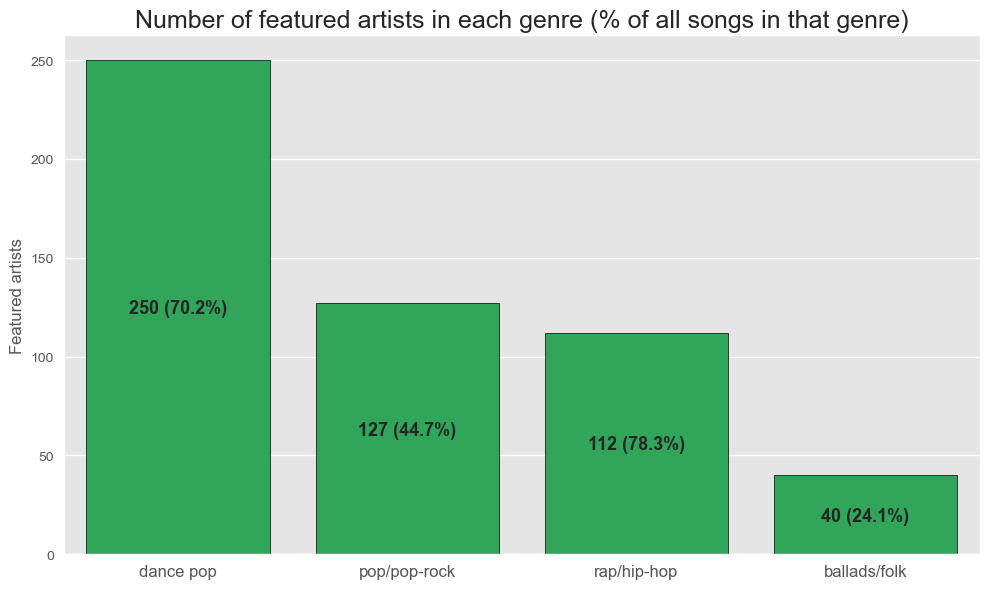

In [52]:
#genre vs number of features
fig, ax = plt.subplots(figsize=(10,6))

groupby_num_feat = spotify_data.groupby('Genre')['number_of_features'].sum().sort_values(ascending=False).reset_index()
merged_feat = pd.merge(groupby_num_feat,genre_data,how='left',on='Genre')

sns.barplot(merged_feat,x='Genre',y='number_of_features', color='#1DB954',edgecolor='black')

plt.title('Number of featured artists in each genre (% of all songs in that genre)',fontsize=18)
plt.ylabel('Featured artists')
plt.xlabel('')
plt.tick_params(axis='x',labelsize=12)
 
    
for i,p in enumerate(ax.patches):
    ax.text(p.get_x() + p.get_width()/2, p.get_height()/2 -5,s=f'{int(p.get_height())} ({p.get_height()/merged_feat["count"][i]*100:.1f}%)',va='bottom',ha='center'
           ,fontsize=13,fontweight='bold')

plt.tight_layout()
plt.show()

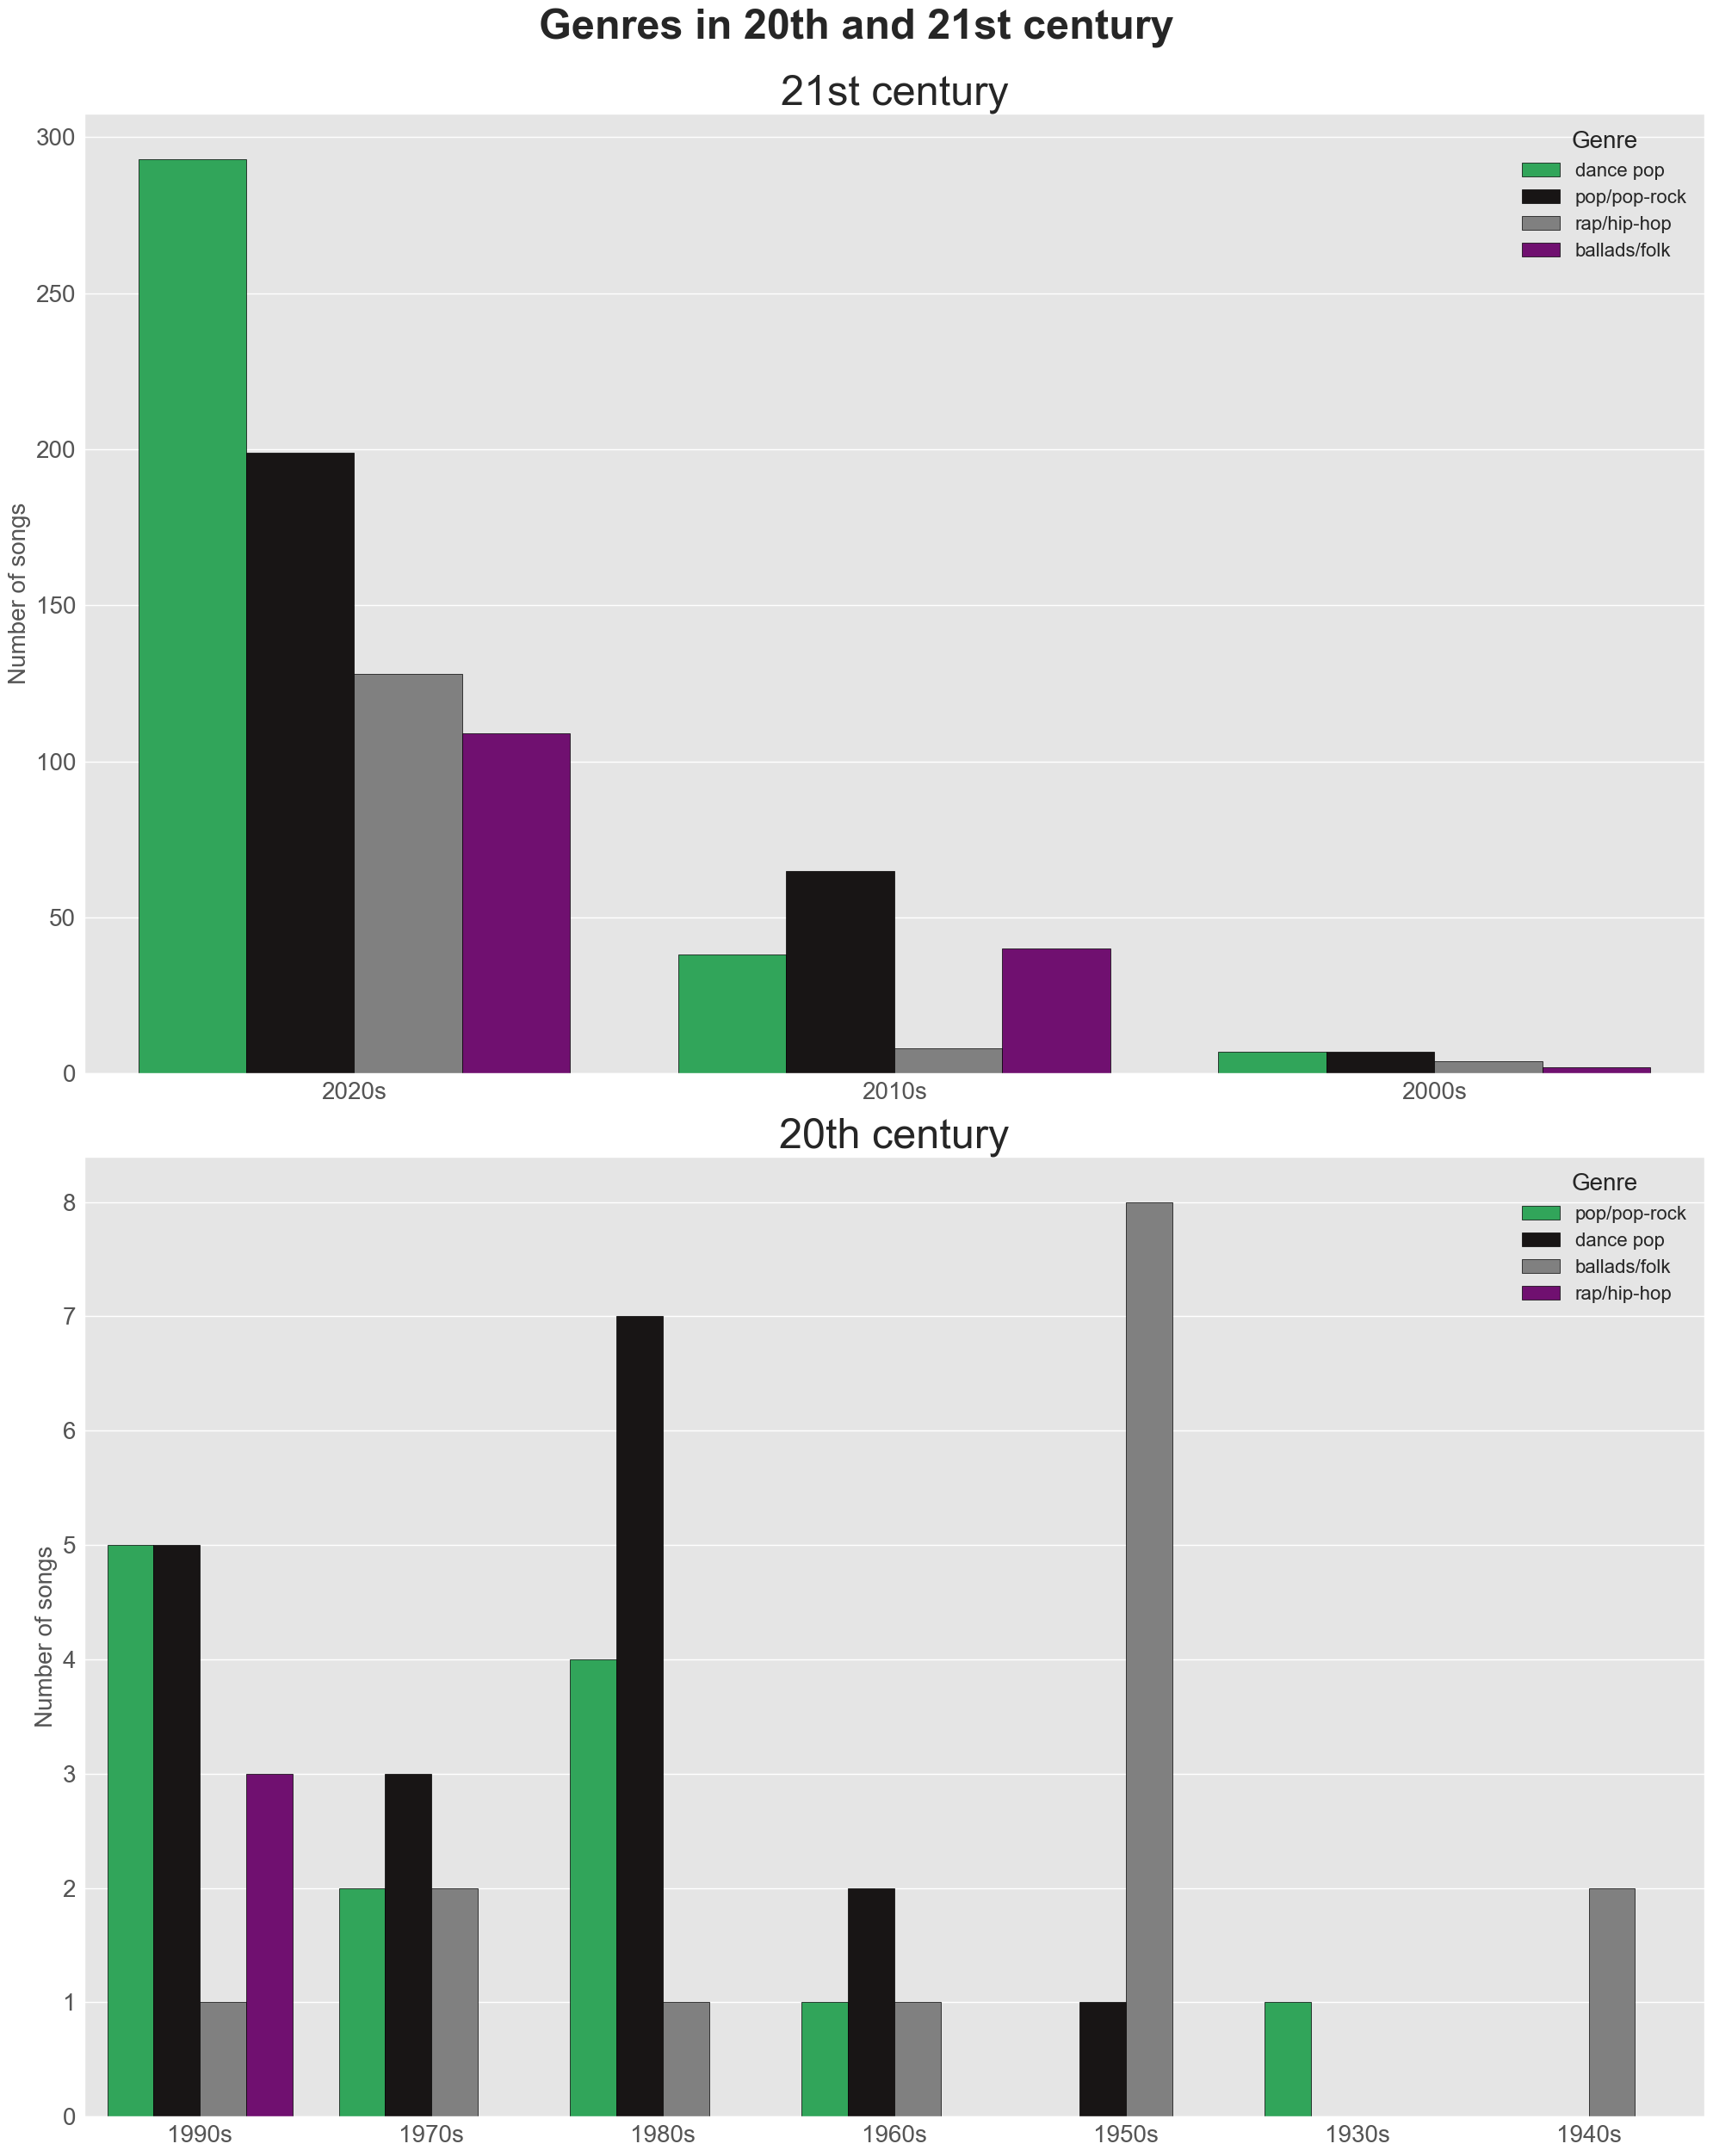

In [67]:
fig, ax = plt.subplots(2,1,figsize=(20,25))
ax = ax.flatten()

#2000s
sns.countplot(spotify_data[spotify_data['era'].isin(['2020s','2010s','2000s'])],x='era',hue='Genre'
              ,palette=sns.color_palette(["#1DB954","#191414","gray","purple"]),edgecolor='black', ax = ax[0])

ax[0].set_title('21st century',fontsize=35)
ax[0].set_ylabel('Number of songs',fontsize=20)
ax[0].set_xlabel('')
ax[0].tick_params(axis='both',labelsize=20)
ax[0].legend(title='Genre',fontsize=16, title_fontsize=20)

#1900s
sns.countplot(spotify_data[~spotify_data['era'].isin(['2020s','2010s','2000s'])],x='era',hue='Genre'
              ,palette=sns.color_palette(["#1DB954","#191414","gray","purple"]),edgecolor='black', ax = ax[1])

ax[1].set_title('20th century',fontsize=35)
ax[1].set_ylabel('Number of songs',fontsize=20)
ax[1].set_xlabel('')
ax[1].tick_params(axis='both',labelsize=20)
ax[1].legend(title='Genre',fontsize=16, title_fontsize=20)

plt.suptitle('Genres in 20th and 21st century', fontsize=35,y=1,fontweight='bold')
plt.tight_layout()
plt.show()

## 5.1 Genres analysis conclusions

### Top genres
* In 2023 the top genres was **dance pop music (37.5% of all songs) and pop/pop-rock (29.9%)**.
* **Ballads/folk music** accounted for **17.5%** of all songs.
* **Rap/hip-hop** was the least listened to genre with only **15.1%**.
---
### Keys across the genres
* In **dance pop music** and **pop/pop-rock** the most common key was C# while the least common one was D#.
* In **rap/hip-hop** the most common key was C# and the least common was E and D#.
* In **ballads/folk** music the most common key was A and the least common was D#.
---
### Charts
* The **most songs** in charts were from the **dance pop music**.
* The **least songs** in charts were **rap/hip-hop** songs.
---
### Featured artists
* Genre with the **most percentage** of featured artists in songs was **rap/hip-hop (78.3% of all rap/hip-hop songs)**.
* On the other hand genre with the **least percentage** of such songs was **ballads/folk with only 24.1%**. 
	- That means that over **75%** of songs in that genre are **solo songs**.
---
### Eras
* The **most songs** in 2023 Spotify list are the songs from the **21st century**, especially from the **2020s**.
* In each era the most predominant genres are **dance pop and pop/pop-rock music**.


# 6. Overall conclusions


In this project, I analyzed Spotify’s Top Songs of 2023 to understand patterns in their audio and non-audio features. I used K-Means to group songs into genres and visualized the results with PCA, which allowed me to see the relationships between the songs in a better way.

Through this project I learned more about the K-Means algorithm and the process of choosing the right K-value.
I also learned more about PCA and its ability to simplify many-dimensional data, making it more interpretable for analysis and visualization.